In [1]:
import keras
import tensorflow as tf

Using TensorFlow backend.


In [2]:
import sys
print(sys.version)
print(keras.__version__)
print(tf.__version__)

3.6.6 |Anaconda, Inc.| (default, Jun 28 2018, 11:27:44) [MSC v.1900 64 bit (AMD64)]
2.2.2
1.10.0


In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [4]:
%matplotlib inline

## Keras essentials

In [5]:
from keras.layers import Dense

In [6]:
layer = Dense(32, input_shape=(784,))

** Sequential model **

In [7]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(784,)))
model.add(layers.Dense(10, activation='softmax'))

In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


** Functional API **

In [9]:
input_tensor = layers.Input(shape=(784,))
x = layers.Dense(32, activation='relu')(input_tensor)
output_tensor = layers.Dense(10, activation='softmax')(x)

model = models.Model(inputs=input_tensor, outputs=output_tensor)

In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


## MNIST data

In [9]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

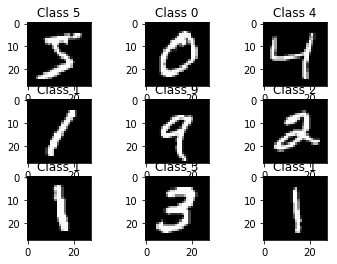

In [10]:
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[i]))
plt.show()

In [11]:
print(x_train.shape)
print(x_test.shape)
print(x_train.dtype)

(60000, 28, 28)
(10000, 28, 28)
uint8


In [12]:
print(y_train.shape)
print(y_test.shape)
print(y_train.dtype)

(60000,)
(10000,)
uint8


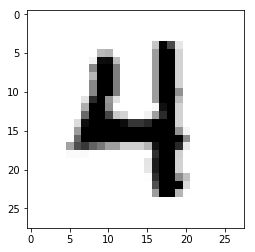

In [13]:
digit = x_train[42421]

plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [16]:
y_train[42421]

4

In [17]:
x_slice = x_train[10:100]
x_slice.shape

(90, 28, 28)

In [18]:
x_slice = x_train[10:100,:,:]
x_slice.shape

(90, 28, 28)

In [19]:
x_slice = x_train[10:100,0:28,0:28]
x_slice.shape

(90, 28, 28)

In [20]:
x_slice = x_train[10:100,8:,8:]
x_slice.shape

(90, 20, 20)

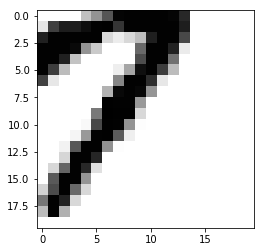

In [21]:
digit = x_slice[5]

plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [22]:
x_slice = x_train[10:100,7:-7,7:-7]
x_slice.shape

(90, 14, 14)

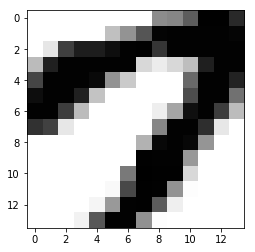

In [23]:
digit = x_slice[5]

plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

## MLP for multiclass classification

In [14]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

In [15]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)
print(x_train.dtype)

(60000, 784)
(10000, 784)
float32


In [18]:
batch_size = 128
num_classes = 10
epochs = 20

One-hot encoding for categorical values

```
0 -> [1, 0, 0, 0, 0, 0, 0, 0, 0]
1 -> [0, 1, 0, 0, 0, 0, 0, 0, 0]
2 -> [0, 0, 1, 0, 0, 0, 0, 0, 0]
etc.
```

In [19]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [20]:
print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


In [22]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

In [23]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

In [25]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 11s 178us/step - loss: 0.2451 - acc: 0.9247 - val_loss: 0.0960 - val_acc: 0.9695
Epoch 2/20
60000/60000 [==============================] - 11s 179us/step - loss: 0.1024 - acc: 0.9692 - val_loss: 0.0901 - val_acc: 0.9731
Epoch 3/20
60000/60000 [==============================] - 10s 170us/step - loss: 0.0760 - acc: 0.9778 - val_loss: 0.0991 - val_acc: 0.9706
Epoch 4/20
60000/60000 [==============================] - 12s 195us/step - loss: 0.0608 - acc: 0.9822 - val_loss: 0.0956 - val_acc: 0.9737
Epoch 5/20
60000/60000 [==============================] - 11s 189us/step - loss: 0.0508 - acc: 0.9854 - val_loss: 0.0860 - val_acc: 0.9785
Epoch 6/20
60000/60000 [==============================] - 11s 183us/step - loss: 0.0431 - acc: 0.9872 - val_loss: 0.0688 - val_acc: 0.9831
Epoch 7/20
60000/60000 [==============================] - 11s 188us/step - loss: 0.0388 - acc: 0.9880 - val_loss: 0.

In [26]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.11115344827978611
Test accuracy: 0.982


In [36]:
history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

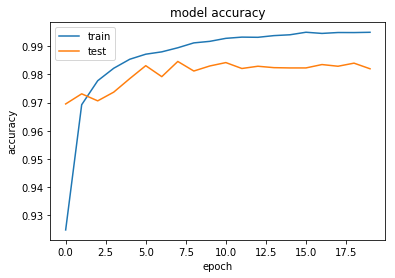

In [27]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

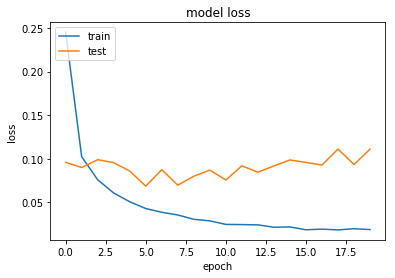

In [28]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

[Live loss plots](https://gist.github.com/stared/dfb4dfaf6d9a8501cd1cc8b8cb806d2e)

In [29]:
model

In [31]:
digit = x_train[42421]

In [36]:
digit = np.reshape(digit, (1,784))

In [37]:
digit.shape

(1, 784)

In [38]:
model.predict(digit)

array([[6.2903979e-36, 7.4251896e-24, 3.0973245e-23, 1.5999770e-31,
        1.0000000e+00, 7.2591995e-22, 7.5898913e-30, 5.4556680e-23,
        1.3750066e-30, 6.1952308e-23]], dtype=float32)

In [39]:
model.predict_classes(digit)

array([4], dtype=int64)

In [40]:
model.predict_proba(digit)

array([[6.2903979e-36, 7.4251896e-24, 3.0973245e-23, 1.5999770e-31,
        1.0000000e+00, 7.2591995e-22, 7.5898913e-30, 5.4556680e-23,
        1.3750066e-30, 6.1952308e-23]], dtype=float32)

## MLP for binary classification

In [41]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [42]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [43]:
train_labels[0]

1

In [44]:
# word_index is a dictionary mapping words to an integer indice
word_index = imdb.get_word_index()
# we reverse it, mapping integer indices to words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# we decode the review; note that our indices were offset by 3
# because 0, 1 and 2 are reserved indices for "padding", "start of sequence", and "unknown".
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [45]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [46]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))  # create an all-zero matrix of shape (len(sequences), dimension)
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

# our vectorized training data
x_train = vectorize_sequences(train_data)
# our vectorized test data
x_test = vectorize_sequences(test_data)

In [50]:
x_train[0].shape

(10000,)

In [48]:
# our vectorized labels:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [51]:
y_train[0]

1.0

In [52]:
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(10000,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [53]:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [54]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 16)                160016    
_________________________________________________________________
dense_11 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [55]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [56]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 206us/step - loss: 0.5084 - acc: 0.7813 - val_loss: 0.3797 - val_acc: 0.8684
Epoch 2/20
15000/15000 [==============================] - 3s 171us/step - loss: 0.3004 - acc: 0.9047 - val_loss: 0.3004 - val_acc: 0.8896
Epoch 3/20
15000/15000 [==============================] - 3s 170us/step - loss: 0.2179 - acc: 0.9285 - val_loss: 0.3087 - val_acc: 0.8710
Epoch 4/20
15000/15000 [==============================] - 3s 172us/step - loss: 0.1750 - acc: 0.9438 - val_loss: 0.2840 - val_acc: 0.8831
Epoch 5/20
15000/15000 [==============================] - 3s 169us/step - loss: 0.1427 - acc: 0.9542 - val_loss: 0.2841 - val_acc: 0.8872
Epoch 6/20
15000/15000 [==============================] - 3s 201us/step - loss: 0.1150 - acc: 0.9651 - val_loss: 0.3162 - val_acc: 0.8770
Epoch 7/20
15000/15000 [==============================] - 3s 174us/step - loss: 0.0980 - acc: 0.9707 - val_loss: 0.3127 - 

In [53]:
history_dict = history.history

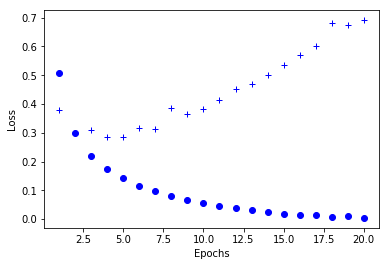

In [54]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss_values, 'bo')
# b+ is for "blue crosses"
plt.plot(epochs, val_loss_values, 'b+')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()

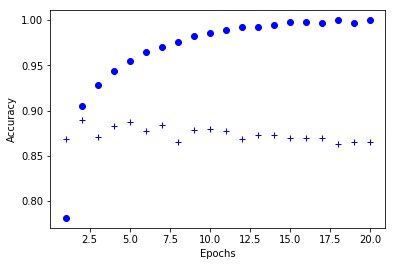

In [55]:
plt.clf()   # clear figure
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo')
plt.plot(epochs, val_acc_values, 'b+')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.show()

In [56]:
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(10000,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 5s 211us/step - loss: 0.4749 - acc: 0.8217
Epoch 2/4
25000/25000 [==============================] - 5s 198us/step - loss: 0.2658 - acc: 0.9097
Epoch 3/4
25000/25000 [==============================] - 5s 193us/step - loss: 0.1982 - acc: 0.9299
Epoch 4/4
25000/25000 [==============================] - 6s 259us/step


In [57]:
results

[0.3231498634147644, 0.87352]

In [58]:
model.predict(x_test)

array([[0.14028227],
       [0.9997029 ],
       [0.29558167],
       ...,
       [0.07234905],
       [0.04342627],
       [0.48159978]], dtype=float32)

In [59]:
del x_train, x_test

## MLP for regression

https://keras.io/datasets/#boston-housing-price-regression-dataset
http://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html

The data comprises 13 features. The 13 features in the input data are as follow:

* Per capita crime rate.
* Proportion of residential land zoned for lots over 25,000 square feet.
* Proportion of non-retail business acres per town.
* Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
* Nitric oxides concentration (parts per 10 million).
* Average number of rooms per dwelling.
* Proportion of owner-occupied units built prior to 1940.
* Weighted distances to five Boston employment centres.
* Index of accessibility to radial highways.
* Full-value property-tax rate per USD10,000.
* Pupil-teacher ratio by town.
* 1000 * (Bk - 0.63) ** 2 where Bk is the proportion of blacks by town.
* % lower status of the population.


In [57]:
from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) =  boston_housing.load_data()

In [58]:
train_data.shape

(404, 13)

In [59]:
train_targets.shape

(404,)

In [60]:
test_data.shape

(102, 13)

In [61]:
train_data[:3]

array([[1.23247e+00, 0.00000e+00, 8.14000e+00, 0.00000e+00, 5.38000e-01,
        6.14200e+00, 9.17000e+01, 3.97690e+00, 4.00000e+00, 3.07000e+02,
        2.10000e+01, 3.96900e+02, 1.87200e+01],
       [2.17700e-02, 8.25000e+01, 2.03000e+00, 0.00000e+00, 4.15000e-01,
        7.61000e+00, 1.57000e+01, 6.27000e+00, 2.00000e+00, 3.48000e+02,
        1.47000e+01, 3.95380e+02, 3.11000e+00],
       [4.89822e+00, 0.00000e+00, 1.81000e+01, 0.00000e+00, 6.31000e-01,
        4.97000e+00, 1.00000e+02, 1.33250e+00, 2.40000e+01, 6.66000e+02,
        2.02000e+01, 3.75520e+02, 3.26000e+00]])

In [65]:
train_targets[:3]

array([15.2, 42.3, 50. ])

In [66]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

In [67]:
def build_model():   
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
    return model

In [68]:
k = 4
num_val_samples = len(train_data) // k
all_scores = []
for i in range(k):
    print('processing fold #', i)
    # prepare the validation data: data from partition # k
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    # prepare the training data: data from all other partitions
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    # build the Keras model (already compiled)
    model = build_model()
    # train the model (in silent mode, verbose=0)
    model.fit(partial_train_data, partial_train_targets,
              epochs=100, batch_size=1, verbose=0)
    # evaluate the model on the validation data
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [69]:
all_scores

[2.099058410908916, 2.1624914254292404, 2.4219052248662063, 2.2447916942067665]

In [70]:
np.mean(all_scores)

2.232061688852782

In [71]:
all_mae_histories = []
for i in range(k):
    print('processing fold #', i)
    # prepare the validation data: data from partition # k
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    # prepare the training data: data from all other partitions
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    # build the Keras model (already compiled)
    model = build_model()
    # train the model (in silent mode, verbose=0)
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=500, batch_size=1, verbose=0)
    mae_history = history.history['val_mean_absolute_error']
    all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [72]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(500)]

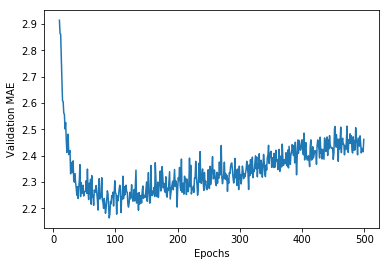

In [73]:
import matplotlib.pyplot as plt

plt.plot(range(500)[10:], average_mae_history[10:])
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [74]:
model.fit(train_data, train_targets,
          epochs=300, batch_size=1, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

102/102 [==============================] - 0s 39us/step


In [75]:
test_mae_score

2.5103115427727793